# EVALUACIÓN DE CARTERAS O ACTIVO EMPELANDO EL MODELO DE MERCADO

# Modelo de Mercado

La ecuación del modelo de mercado es:

$$\LARGE \boxed{ R_i = \alpha_i + \beta_i R_m + \epsilon_i}$$

donde:

- $ R_i $: Rendimiento del activo individual
- $ \alpha_i $: Alpha del activo
- $ \beta_i $: Beta del activo
- $ R_m $: Rendimiento del mercado
- $ \epsilon_i $: Término de error


# Análisis de Rendimiento de una empresa, cartera o fondo: Alpha y Beta

## Resumen:

- **Beta** nos ayuda a comprender cómo el mercado afecta al rendimiento del fondo

- mientras que **Alpha** nos indica el valor añadido o perdido por la gestión de la empresa, cartera o fondo más allá de las influencias del mercado. 

## Beta: Medida de Riesgo de Mercado

**Beta** es un indicador de cuánto del rendimiento de una empresa, cartera o de un fondo está correlacionado con el rendimiento del mercado.

- **Interpretación**:
  - **Beta > 1**: El fondo es más volátil que el mercado. Si el mercado sube o baja, el fondo tiende a subir o bajar en una mayor proporción.
  - **Beta < 1**: El fondo es menos volátil. Los movimientos del mercado tienen un impacto menor en el fondo.
  - **Beta ≈ 1**: El fondo tiene una volatilidad similar al mercado.

La **Beta** nos ayuda a entender qué parte del rendimiento del activo es atribuible a los movimientos del mercado. 

#### Factores que Influyen en el Valor de la Beta de Mercado de una Empresa

- **Tipo de Sector**: Sectores como la tecnología pueden tener betas más altos, mientras que sectores estables como los servicios públicos suelen tener betas más bajos.

- **Diversificación de Productos**: Empresas con diversificación en productos o servicios tienden a tener betas más bajos.

- **Alcance Global vs. Local**: Operaciones globales pueden aumentar el beta, mientras que las empresas locales pueden tener betas más bajos.

- **Estructura Financiera**: Mayor apalancamiento financiero (deuda) puede llevar a un beta más alto, reflejando un riesgo financiero mayor.

Estos factores afectan la percepción del riesgo y la volatilidad de la empresa, influyendo así en su beta de mercado.


#### Factores que Influyen en la Beta de una Cartera

- **Composición de la Cartera**: La beta es una media ponderada de las betas de los activos individuales en la cartera.

- **Correlación de los Activos**: Las correlaciones entre los activos en la cartera afectan su beta total.

- **Apalancamiento Financiero**: El uso de apalancamiento puede aumentar la beta de la cartera, incrementando el riesgo y el potencial de ganancia.

- **Cambios en el Mercado**: Las fluctuaciones del mercado pueden alterar las betas de los activos individuales y, por lo tanto, la beta de la cartera.

Estos factores son clave para entender y gestionar la beta de una cartera de inversión.




## Alpha: Rendimiento Atribuible al Gestor

**Alpha** representa la rentabilidad del fondo que no se puede explicar solo por los movimientos del mercado. Esencialmente, es el valor que el gestor de la empresa o de la cartera añade o resta al rendimiento.

- **Interpretación**:
  - **Alpha Positivo**: Indica un rendimiento superior al esperado, dada la Beta del fondo. El gestor ha añadido valor.
  - **Alpha Negativo**: Señala un rendimiento inferior al esperado. El gestor no ha logrado superar el rendimiento que se esperaría basado en el riesgo asumido.

El **Alpha** es crucial para evaluar la habilidad del gestor para generar valor independientemente de las tendencias del mercado.



#### Factores que Influyen en el Alpha de una Empresa

- **Habilidad de Gestión**: Un equipo de gestión competente puede mejorar significativamente el rendimiento de la empresa.

- **Innovación y Estrategia**: La capacidad de innovar y ejecutar estrategias efectivas puede llevar a un rendimiento superior.

- **Ventajas Competitivas**: Características únicas como patentes fuertes o una sólida presencia de marca pueden contribuir a un alpha positivo.

- **Respuesta a Cambios del Mercado**: La agilidad para adaptarse a las condiciones cambiantes del mercado puede influir positivamente en el alpha.

Estos factores pueden ayudar a que una empresa logre un rendimiento que supere las expectativas del mercado.

#### Factores que Influyen en el Alpha de una Cartera o Fondo

- **Selección de Activos**: La capacidad para elegir activos que superen consistentemente al mercado es clave para un alpha positivo.

- **Estrategia de Inversión**: Estrategias innovadoras que capitalizan oportunidades únicas pueden generar un alpha superior.

- **Diversificación**: Diversificar eficazmente puede mejorar el alpha al reducir el riesgo innecesario.

- **Costos de Gestión**: Costos menores de gestión pueden traducirse en un mayor alpha, ya que los costos reducen el rendimiento neto.

Estos aspectos son cruciales para lograr un alpha que indique un rendimiento superior al del mercado.


## Veamos los resultados del modelo con algunos activos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cvxpy as cp
import plotly.graph_objects as go
from tqdm.auto import tqdm
import statsmodels.api as sm
import warnings
from datetime import datetime, timedelta

# print(plt.style.available) #list of available styles
#plt.style.use('ggplot')
# Configura el estilo de Seaborn para que los gráficos se vean más atractivos
sns.set(style="whitegrid")

plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
tickers = [
    "AAPL",  # Apple Inc.
    "WFC",   # Wells Fargo & Co
    "XOM",   # Exxon Mobil Corp
    "JNJ",   # Johnson & Johnson
    "SBUX"   # Starbucks Corp
]

# Diccionario con tickers, nombres de empresas y sectores
empresas_dict = {
    "AAPL": {"nombre": "Apple Inc.", "sector": "Tecnología / Electrónica de Consumo", "alcance": "Global"},
    "WFC": {"nombre": "Wells Fargo & Co", "sector": "Servicios Financieros / Bancario", "alcance": "Local"},
    "XOM": {"nombre": "Exxon Mobil Corp", "sector": "Petróleo y Gas", "alcance": "Global"},
    "JNJ": {"nombre": "Johnson & Johnson", "sector": "Farmacéutica y Productos de Consumo", "alcance": "Global/Local"},
    "SBUX": {"nombre": "Starbucks Corp", "sector": "Alimentación y Bebidas / Servicio de Cafeterías", "alcance": "Local"}
}


In [3]:
precios = yf.download(tickers, start="2019-01-01", end="2020-12-31")["Adj Close"] # Precios ajustados al cierre
indice = yf.download("SPY", start="2019-01-01", end="2020-12-31")[["Adj Close"]] # Precios ajustados al cierre
precios = precios.dropna() # Eliminar filas con NA's
indice = indice.dropna() # Eliminar filas con NA's
indice.columns = ["MERCADO"] # Renombrar columna

# Calcular rendimientos logarítmicos
rendimientos = np.log(precios / precios.shift(1)).dropna()

rent_indice = np.log(indice / indice.shift(1)).dropna()


[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
resultados_m_mercado = []
summary_m_mercado = []

for activo in rendimientos.columns:
    
    # Preparar las variables X e Y para la regresión
    X = rent_indice # Rendimientos del mercado
    y = rendimientos[activo]  # Rendimientos del activo
    X_sm = sm.add_constant(X)  # Añadir una constante a la variable X

    # Crear y ajustar el modelo
    modelo = sm.OLS(y, X_sm).fit()

    # Almacenar los atributos en un diccionario y añadir a la lista
    resultado = {
        'activo': activo,
        'alpha': modelo.params[0],
        'beta': modelo.params[1],
        'p_value_alpha': modelo.pvalues[0],
        'p_value_beta': modelo.pvalues[1],
        't_value_alpha': modelo.tvalues[0],
        't_value_beta': modelo.tvalues[1],
        'rsquared': modelo.rsquared,
        'fvalue': modelo.fvalue,
        'conf_int_alpha_low': modelo.conf_int()[0][0],
        'conf_int_alpha_high': modelo.conf_int()[0][1],
        'conf_int_beta_low': modelo.conf_int()[1][0],
        'conf_int_beta_high': modelo.conf_int()[1][1],
        'aic': modelo.aic,
        'bic': modelo.bic
    }
    resultados_m_mercado.append(resultado)
    summary_m_mercado.append(modelo.summary())

# Convertir los resultados a un DataFrame
df_resultados_m_mercado = pd.DataFrame(resultados_m_mercado)
df_resultados_m_mercado = df_resultados_m_mercado.set_index('activo')

df_summary_m_mercado = pd.DataFrame(summary_m_mercado)
df_summary_m_mercado.index = [x for x in rendimientos.columns if x != 'SPY']


Vamos a interpretar los resultados de un modelo de regresión lineal.

Primero veamos el formato y valores que muestra el summary del modelo:

In [5]:
print(df_summary_m_mercado.loc['AAPL',0])

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     937.5
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          7.93e-117
Time:                        18:42:03   Log-Likelihood:                 1430.3
No. Observations:                 503   AIC:                            -2857.
Df Residuals:                     501   BIC:                            -2848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.001      2.274      0.0

### Interpretación de Métricas Estadísticas en el Modelo Summary

### Métricas del **modelo en general**

#### 1. R-squared y Adjusted R-squared:
   - **R-squared**: Proporción de la variabilidad de la variable dependiente explicada por el modelo.
   - **Adjusted R-squared**: Versión ajustada del R-squared que tiene en cuenta el número de predictores en el modelo.

#### 2. F-statistic y Prob(F-statistic):
   - **F-statistic**: Evalúa la significancia general del modelo.
   - **Prob(F-statistic)**: Probabilidad de observar el valor de F-statistic, si la hipótesis nula es verdadera.

#### 3. Log-Likelihood:
   - Indica cuán bien el modelo se ajusta a los datos; mayor es mejor.

#### 4. AIC y BIC:
   - **AIC (Criterio de Información de Akaike)**: Evalúa el modelo penalizando la complejidad.
   - **BIC (Criterio de Información Bayesiano)**: Similar al AIC, pero con una penalización más fuerte para modelos complejos.

**Conclusión**: Estas métricas ofrecen una visión completa sobre la calidad y adecuación del modelo.

### Métricas de los **parámetros**

#### 1. Valores p (p-values):
   - Indican la probabilidad de observar los datos si la hipótesis nula es verdadera.
   - Un valor p **bajo** (típicamente < 0.05) sugiere significancia estadística.

#### 2. Estadísticas t (t-values):
   - Miden cuánto un coeficiente se diferencia de cero.
   - Un t-value **alto** en valor absoluto (e.g., > 2 o < -2) indica significancia.

**En resumen:** Parámetros con valores p bajos y t-values altos se consideran **estadísticamente significativos**.


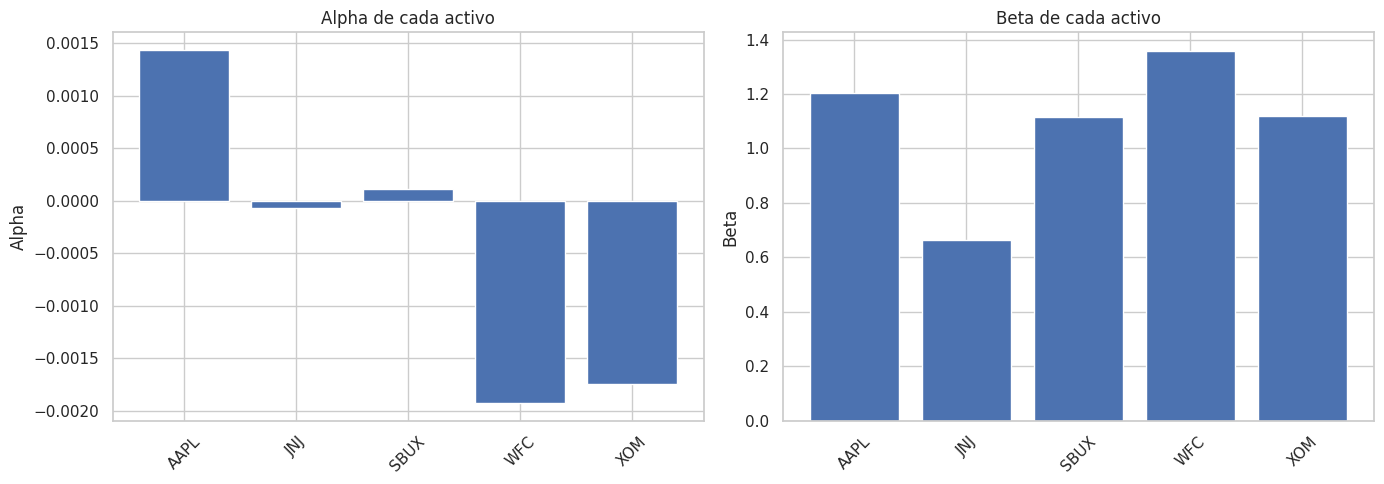

In [6]:

# Configura el tamaño de la figura y el número de subplots
fig, axs = plt.subplots(1,2, figsize=(14, 5))

# Primera gráfica: Alphas
axs[0].bar(df_resultados_m_mercado.index, df_resultados_m_mercado['alpha'])
axs[0].set_title('Alpha de cada activo')
axs[0].set_ylabel('Alpha')
axs[0].tick_params(axis='x', rotation=45)  # Rota las etiquetas del eje X si son demasiado largas

# Segunda gráfica: Betas
axs[1].bar(df_resultados_m_mercado.index, df_resultados_m_mercado['beta'])
axs[1].set_title('Beta de cada activo')
axs[1].set_ylabel('Beta')
axs[1].tick_params(axis='x', rotation=45)  # Rota las etiquetas del eje X si son demasiado largas

# Ajustar el layout para evitar la superposición de elementos
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [7]:
df_resultados_m_mercado.loc[['AAPL', 'WFC', 'XOM', 'JNJ', 'SBUX'], ['beta', 'p_value_beta', 't_value_beta']]

,beta,p_value_beta,t_value_beta
activo,,,
AAPL,1.204058,7.930354e-117,30.618180
WFC,1.358935,3.944434e-94,25.824631
XOM,1.120748,2.322558e-81,23.189712
JNJ,0.663398,4.641012e-73,21.484881
SBUX,1.113916,1.513672e-117,30.773441


In [8]:
df_resultados_m_mercado.loc[['AAPL', 'WFC', 'XOM', 'JNJ', 'SBUX'], ['alpha', 'p_value_alpha', 't_value_alpha']]

,alpha,p_value_alpha,t_value_alpha
activo,,,
AAPL,0.001433,0.023391,2.273953
WFC,-0.001922,0.023076,-2.279190
XOM,-0.001747,0.024562,-2.255040
JNJ,-0.000066,0.894099,-0.133188
SBUX,0.000109,0.850801,0.188194


## Calculemos ahora los parámetros para todos los activos del SP500

In [9]:
precios_sp500 = pd.read_csv("../data/sp500_precios.csv", index_col=0, parse_dates=True)
precios_sp500.head(5)

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,63.381710,31.963160,37.893341,70.646538,63.908173,26.190001,131.077469,224.570007,78.138260,35.836353,...,99.469666,41.850040,53.962513,35.926987,62.568439,83.576164,95.619514,156.240005,35.226196,81.659958
2019-01-03,61.046745,29.581663,34.118874,68.318840,60.892082,25.780001,126.602242,215.699997,73.418312,35.678822,...,98.507370,41.685143,53.133984,35.945953,60.423553,81.473938,93.889969,146.880005,35.031338,78.837448
2019-01-04,63.159786,31.530161,35.575378,70.519852,62.630009,26.389999,131.524994,226.190002,75.200783,36.501442,...,102.480431,42.093063,55.093021,36.988953,62.972939,83.594421,97.096619,152.970001,36.107277,81.930641
2019-01-07,64.500923,32.425674,35.496204,71.549126,63.567928,26.330000,131.981812,229.259995,75.673691,36.685211,...,104.300240,41.910801,55.379513,37.652691,62.041607,83.503029,97.134010,155.289993,36.251289,82.423607
2019-01-08,65.446503,31.904114,36.172874,71.881653,62.804718,26.430000,135.319580,232.679993,77.519836,37.367813,...,107.568253,42.396820,55.782177,37.396687,62.624863,83.338516,94.955734,156.330002,36.581703,83.651207


In [10]:
# Calcular rendimientos logarítmicos
rendimientos_sp500 = np.log(precios_sp500).diff().dropna()

In [11]:
start_date = precios_sp500.index[0].date()
end_date = precios_sp500.index[-1].date()+ timedelta(days=1)

indice = yf.download("SPY", start=start_date, end=end_date)[["Adj Close"]] # Precios ajustados al cierre

ret_indice = np.log(indice).diff().dropna()

[*********************100%%**********************]  1 of 1 completed


In [12]:
# Almacena los resultados
resultados_sp500_m_mercado = []
summary_sp_500_m_mercado = []

for activo in rendimientos_sp500.columns:
   
        # Preparar las variables X e Y para la regresión
    X = ret_indice  # Rendimientos del mercado
    y = rendimientos_sp500[activo]    # Rendimientos del activo
    X_sm = sm.add_constant(X)   # Añadir una constante a la variable X

    # Crear y ajustar el modelo
    modelo = sm.OLS(y, X_sm).fit()
    # Almacenar los atributos en un diccionario y añadir a la lista
    resultado = {
        'activo': activo,
        'alpha': modelo.params[0],
        'beta': modelo.params[1],
        'p_value_alpha': modelo.pvalues[0],
        'p_value_beta': modelo.pvalues[1],
        't_value_alpha': modelo.tvalues[0],
        't_value_beta': modelo.tvalues[1],
        'rsquared': modelo.rsquared,
        'fvalue': modelo.fvalue,
        'conf_int_alpha_low': modelo.conf_int()[0][0],
        'conf_int_alpha_high': modelo.conf_int()[0][1],
        'conf_int_beta_low': modelo.conf_int()[1][0],
        'conf_int_beta_high': modelo.conf_int()[1][1],
        'aic': modelo.aic,
        'bic': modelo.bic
    }
    resultados_sp500_m_mercado.append(resultado)
    summary_sp_500_m_mercado.append(modelo.summary())

# Convertir los resultados a un DataFrame
df_resultados_sp500_m_mercado = pd.DataFrame(resultados_sp500_m_mercado)
df_resultados_sp500_m_mercado = df_resultados_sp500_m_mercado.set_index('activo')

summary_sp_500_m_mercado = pd.DataFrame(summary_sp_500_m_mercado)
summary_sp_500_m_mercado.index = rendimientos_sp500.columns

In [13]:
beta_sig = 100 * (df_resultados_sp500_m_mercado['p_value_beta']>0.05).sum()/len(df_resultados_sp500_m_mercado)
alpha_sig = 100 * (df_resultados_sp500_m_mercado['p_value_alpha']>0.05).sum()/len(df_resultados_sp500_m_mercado)

print(f"El {beta_sig:.2f}% de los betas no son significativos")

print(f"El {alpha_sig:.2f}% de los alphas no son significativos")

El 0.00% de los betas no son significativos
El 99.18% de los alphas no son significativos


In [14]:
beta_mayor_1 = 100 * (df_resultados_sp500_m_mercado['beta']>1).sum()/len(df_resultados_sp500_m_mercado)

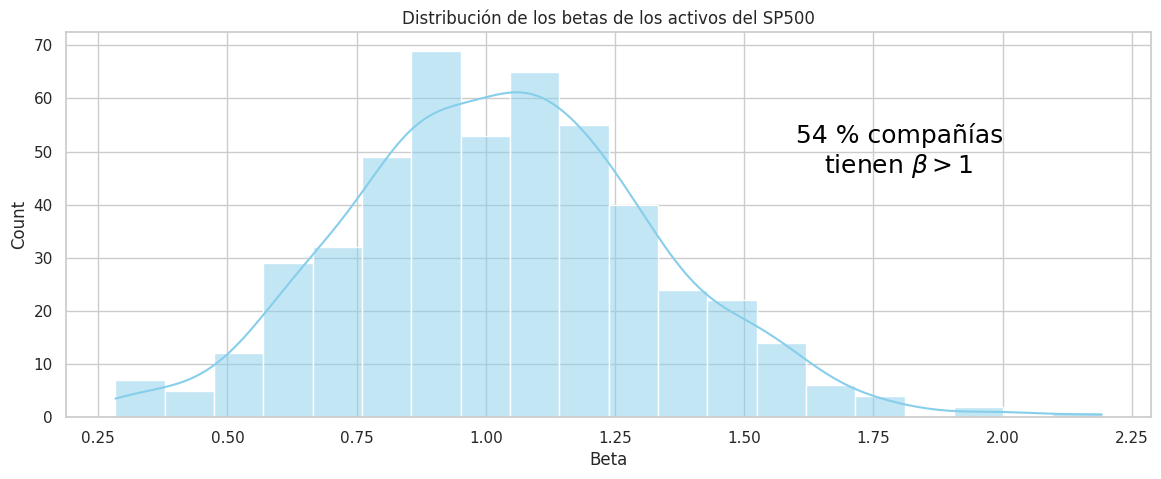

In [15]:
# Configura el estilo de Seaborn para que los gráficos se vean más atractivos
sns.set(style="whitegrid")

# Configura el tamaño de la figura y el número de subplots (1 fila, 2 columnas)
fig, axs = plt.subplots(figsize=(14, 5))

# Histograma para Beta
sns.histplot(df_resultados_sp500_m_mercado['beta'], ax=axs, color='skyblue', kde=True)
axs.set_title('Distribución de los betas de los activos del SP500')
axs.set_xlabel('Beta')
#axs[0].set_ylabel('Frecuencia')

# Añade una nota en la gráfica de la izquierda
nota = f"{int(beta_mayor_1)} % compañías\ntienen $\\beta > 1$"
axs.text(1.8, 50, nota, ha='center', va='center', fontsize=18, color='black')



# Mostrar la gráfica
plt.show()


### Analicemos ahora distintos sectores dentro del SP500

Para analizar el comportamiento de sectores del SP500, usamos los índices de la web : [S&P Dow Jones Indices](https://www.spglobal.com/spdji/es/index-family/equity/us-equity/sp-sectors/#indices)

In [2]:
energy_data = pd.read_csv("../data/S&P 500 Energy Historical Data.csv", index_col=0, parse_dates=True)
financials_data = pd.read_csv("../data/S&P 500 Financials Historical Data.csv", index_col=0, parse_dates=True)
industrials_data = pd.read_csv("../data/S&P 500 Industrials Historical Data.csv", index_col=0, parse_dates=True)
information_technology_data = pd.read_csv("../data/S&P 500 Information Technology Historical Data.csv",
                    index_col=0,
                    parse_dates=True,
                    thousands=',', 
                    decimal='.',
                    converters={'Change %': lambda x: float(x.strip('%'))/100})


In [3]:
# Extraer solo la columna 'price' de cada DataFrame
energy_prices = energy_data['Price'].rename('Energy')
financials_prices = financials_data['Price'].rename('Financials')
industrials_prices = industrials_data['Price'].rename('Industrials')
information_technology_prices = information_technology_data['Price'].rename('Information Technology')

# Concatenar las columnas en un nuevo DataFrame
sector_prices = pd.concat([energy_prices, financials_prices, industrials_prices, information_technology_prices], axis=1)

sector_returns = np.log(sector_prices).diff().dropna()



In [4]:
sector_returns

,Energy,Financials,Industrials,Information Technology
Date,,,,
2020-01-03,-0.003416,-0.011084,-0.001172,-0.010672
2020-01-06,0.007752,-0.000568,-0.000272,0.002894
2020-01-07,-0.002057,-0.006706,-0.001231,-0.001107
2020-01-08,-0.017557,0.005392,0.002289,0.010288
2020-01-09,0.007537,0.007663,0.004562,0.011208
...,...,...,...,...
2024-01-08,-0.011718,0.005950,0.005809,0.027088
2024-01-09,-0.016391,-0.006921,-0.002425,0.002535
2024-01-10,-0.010158,0.002053,0.004782,0.009987


In [9]:
start_date = sector_prices.index[0].date()
end_date = sector_prices.index[-1].date()+ timedelta(days=1)

indice = yf.download("SPY", start=start_date, end=end_date)[["Adj Close"]] # Precios ajustados al cierre

ret_indice = np.log(indice).diff().dropna()

ret_indice = ret_indice[ret_indice.index.isin(sector_returns.index)]

[*********************100%%**********************]  1 of 1 completed


In [12]:
# Almacena los resultados
resultados_sector_m_mercado = []
summary_sector_m_mercado = []

for activo in sector_returns.columns:
   
        # Preparar las variables X e Y para la regresión
    X = ret_indice  # Rendimientos del mercado
    y = sector_returns[activo]    # Rendimientos del activo
    X_sm = sm.add_constant(X)   # Añadir una constante a la variable X

    # Crear y ajustar el modelo
    modelo = sm.OLS(y, X_sm).fit()
    # Almacenar los atributos en un diccionario y añadir a la lista
    resultado = {
        'activo': activo,
        'alpha': modelo.params[0],
        'beta': modelo.params[1],
        'p_value_alpha': modelo.pvalues[0],
        'p_value_beta': modelo.pvalues[1],
        't_value_alpha': modelo.tvalues[0],
        't_value_beta': modelo.tvalues[1],
        'rsquared': modelo.rsquared,
        'fvalue': modelo.fvalue,
        'conf_int_alpha_low': modelo.conf_int()[0][0],
        'conf_int_alpha_high': modelo.conf_int()[0][1],
        'conf_int_beta_low': modelo.conf_int()[1][0],
        'conf_int_beta_high': modelo.conf_int()[1][1],
        'aic': modelo.aic,
        'bic': modelo.bic
    }
    resultados_sector_m_mercado.append(resultado)
    summary_sector_m_mercado.append(modelo.summary())

# Convertir los resultados a un DataFrame
df_resultados_sector_m_mercado = pd.DataFrame(resultados_sector_m_mercado)
df_resultados_sector_m_mercado = df_resultados_sector_m_mercado.set_index('activo')

summary_sector_m_mercado = pd.DataFrame(summary_sector_m_mercado)
summary_sector_m_mercado.index = sector_returns.columns

In [13]:
df_resultados_sector_m_mercado

,alpha,beta,p_value_alpha,p_value_beta,t_value_alpha,t_value_beta,rsquared,fvalue,conf_int_alpha_low,conf_int_alpha_high,conf_int_beta_low,conf_int_beta_high,aic,bic
activo,,,,,,,,,,,,,,
Energy,-0.000176,1.097877,0.777945,8.966335e-108,-0.282074,25.017862,0.383773,625.893410,-0.001400,1.011763,0.001048,1.183991,-5041.601151,-5031.771689
Financials,-0.000282,1.104545,0.328336,1.447536e-301,-0.977947,54.368281,0.746270,2955.909935,-0.000849,1.064679,0.000284,1.144412,-6592.654320,-6582.824858
Industrials,-0.000135,0.993255,0.546390,0.000000e+00,-0.603384,63.307112,0.799513,4007.790475,-0.000572,0.962467,0.000303,1.024043,-7113.108228,-7103.278766
Information Technology,0.000165,1.228116,0.420004,0.000000e+00,0.806745,85.562753,0.879294,7320.984700,-0.000236,1.199950,0.000565,1.256283,-7292.360487,-7282.531025


In [14]:
df_resultados_sector_m_mercado.loc[:, ['alpha', 'p_value_alpha', 't_value_alpha']]

,alpha,p_value_alpha,t_value_alpha
activo,,,
Energy,-0.000176,0.777945,-0.282074
Financials,-0.000282,0.328336,-0.977947
Industrials,-0.000135,0.546390,-0.603384
Information Technology,0.000165,0.420004,0.806745


In [15]:
df_resultados_sector_m_mercado.loc[:, ['beta', 'p_value_beta', 't_value_beta']]

,beta,p_value_beta,t_value_beta
activo,,,
Energy,1.097877,8.966335e-108,25.017862
Financials,1.104545,1.447536e-301,54.368281
Industrials,0.993255,0.000000e+00,63.307112
Information Technology,1.228116,0.000000e+00,85.562753


---
**Gestión Activa de Carteras:**

- **¿Qué es?**: En la gestión activa, un gestor de cartera toma decisiones continuas de compra y venta de activos para superar un índice de referencia o benchmark.
- **Ventajas**:
  - **Potencial de Mayor Rendimiento**: Puede superar al mercado si las decisiones son acertadas.
  - **Adaptabilidad**: Permite ajustarse rápidamente a cambios en el mercado.
  - **Personalización**: Se adapta a objetivos y restricciones específicas del inversor.
- **Inconvenientes**:
  - **Mayores Costos**: Involucra comisiones más altas por las transacciones frecuentes.
  - **Riesgo de Desempeño**: Existe el riesgo de que el gestor no supere al mercado.
  - **Requiere Expertise**: Depende de la habilidad y experiencia del gestor.

**Gestión Pasiva de Carteras:**

- **¿Qué es?**: La gestión pasiva implica replicar un índice de mercado, como el S&P 500, comprando una proporción de todos los activos en ese índice.
- **Ventajas**:
  - **Menor Costo**: Generalmente, tiene menores comisiones y gastos operativos.
  - **Transparencia y Previsibilidad**: Es más fácil de entender y prever su comportamiento.
  - **Eficiencia a Largo Plazo**: Históricamente, ha mostrado ser eficiente en rendimientos a largo plazo.
- **Inconvenientes**:
  - **Sin Oportunidades de Superar el Mercado**: No busca superar el índice, solo igualarlo.
  - **Menos Flexibilidad**: No se ajusta a cambios específicos del mercado o del inversor.
  - **Riesgo de Mercado**: Está sujeto a la volatilidad total del mercado.

En resumen

- La gestión activa busca superar al mercado (**generar alpha**) con decisiones estratégicas, pero conlleva mayores costos y riesgos
 
- La gestión pasiva busca replicar el rendimiento de un índice con menores costos, pero sin la oportunidad de superar dicho índice. La elección entre ambas depende de los objetivos, el horizonte de tiempo, y la tolerancia al riesgo del inversor.
---


¿Qué dicen los datos históricos sobre si los gestores de fondos son capaces de generar alpha?.

Existen numerosos estudios al respecto. Abajo se pueden ver dos ejemplos en los que se confirma que solo un porcentaje muy bajo de gestores son capaces de generar alpha de manera consistente 

Informe de Funspeople [¿Es cierto que la gestión pasiva es mejor que la activa?](https://fundspeople.com/es/es-cierto-que-la-gestion-pasiva-es-mejor-que-la-activa/)

Figura 1: ¿De verdad los gestores superan al mercado?

<img src="../imgs/fondos_superan_indice.PNG"  alt="drawing" width="800"/>


Informe Morningstar's European Active/Passive Barometer Year-End 2022

Figura 2: Porcentaje de fondos que superan al índice

<img src="../imgs/fondos_superan_indice_2.PNG"  alt="drawing" width="700"/>